In [1]:
import os
os.environ['KAGGLE_USERNAME'] = "ohmtrivedi1asdfasdf998"
os.environ['KAGGLE_KEY'] = "6d6475d130e00edf3363ae86f2a3basdfd5f"

In [2]:
import pandas as pd

In [3]:
!kaggle datasets download -d zalando-research/fashionmnist
!unzip fashionmnist.zip -d fashionmnist

 93% 64.0M/68.8M [00:00<00:00, 49.5MB/s]
100% 68.8M/68.8M [00:00<00:00, 88.4MB/s]
Archive:  fashionmnist.zip
  inflating: fashionmnist/fashion-mnist_test.csv  
  inflating: fashionmnist/fashion-mnist_train.csv  
  inflating: fashionmnist/t10k-images-idx3-ubyte  
  inflating: fashionmnist/t10k-labels-idx1-ubyte  
  inflating: fashionmnist/train-images-idx3-ubyte  
  inflating: fashionmnist/train-labels-idx1-ubyte  


In [4]:
train = pd.read_csv("fashionmnist/fashion-mnist_train.csv")

In [37]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,0,83,155,136,116,148,110,118,67,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,118,...,199,165,108,108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,159,6,91,0,0,85,159,0,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,0,1,0,0,87,114,77,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,...,228,229,231,231,218,230,255,0,0,0,0,0,0,0,0,0,0,0,116,140,147,166,176,174,173,173,174,173,177,164,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
test = pd.read_csv("fashionmnist/fashion-mnist_test.csv")

In [ ]:
train

In [6]:
X_train = train.drop("label",axis=1)
Y_train = train["label"]

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
np.array(X_train)[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
         0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
       214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 217, 22

In [9]:
np.array(X_train)[1].reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          1,   0,   0,   0,   0,  81,  21,   0,   1,   0,   1,   0,   0,
          0,   0],
       [  

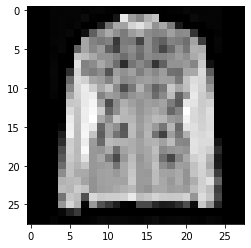

In [10]:
plt.imshow(np.array(X_train)[5].reshape(28,28),cmap="gray")

In [11]:
from keras.layers import Dense
from keras.models import Sequential

In [12]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [12]:
#X_train = X_train/255

In [13]:
X_train.shape[1]

784

In [51]:
model = Sequential()
model.add(Dense(X_train.shape[1],input_dim=X_train.shape[1],activation="relu"))
model.add(Dense(1024,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [52]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [53]:
h = model.fit(X_train,Y_train,epochs=50,batch_size=800)

Epoch 1/50
75/75 [==============================] - 1s 9ms/step - loss: 19.9490 - accuracy: 0.7099
Epoch 2/50
75/75 [==============================] - 1s 8ms/step - loss: 0.6608 - accuracy: 0.8123
Epoch 3/50
75/75 [==============================] - 1s 8ms/step - loss: 0.5007 - accuracy: 0.8376
Epoch 4/50
75/75 [==============================] - 1s 8ms/step - loss: 0.4274 - accuracy: 0.8541
Epoch 5/50
75/75 [==============================] - 1s 8ms/step - loss: 0.3696 - accuracy: 0.8696
Epoch 6/50
75/75 [==============================] - 1s 8ms/step - loss: 0.3469 - accuracy: 0.8759
Epoch 7/50
75/75 [==============================] - 1s 8ms/step - loss: 0.3238 - accuracy: 0.8828
Epoch 8/50
75/75 [==============================] - 1s 8ms/step - loss: 0.2991 - accuracy: 0.8909
Epoch 9/50
75/75 [==============================] - 1s 8ms/step - loss: 0.2731 - accuracy: 0.9003
Epoch 10/50
75/75 [==============================] - 1s 8ms/step - loss: 0.2556 - accuracy: 0.9056
Epoch 11/50
75/75 

In [54]:
X_test = test.drop("label",axis=1)
Y_test = test["label"]

In [55]:
pred = model.predict(X_test)

In [56]:
res = []
for i in pred:
  res.append(np.argmax(i))

In [37]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy_score(Y_test,res)

0.8737

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rfc = RandomForestClassifier()

In [49]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
rfc.score(X_test,Y_test)

0.8868

In [35]:
pred[1]

array([7.5922109e-37, 1.0000000e+00, 0.0000000e+00, 5.5970394e-35,
       0.0000000e+00, 0.0000000e+00, 1.6081769e-38, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)